In [1]:
# Install required libraries
!pip install easyocr opencv-python-headless tensorflow matplotlib scikit-learn
!pip install pyspellchecker
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path (Change this to your Drive folder)
DATASET_PATH = "/content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset"

# Paths for images and annotations
DYSLEXIC_FOLDER = os.path.join(DATASET_PATH, "dyslexic_images")
NORMAL_FOLDER = os.path.join(DATASET_PATH, "Normal")
ANNOTATION_FILE = os.path.join(DATASET_PATH, "annotations.json")

# Print paths to verify
print("Dyslexic Images Path:", DYSLEXIC_FOLDER)
print("Normal Images Path:", NORMAL_FOLDER)
print("Annotations File Path:", ANNOTATION_FILE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dyslexic Images Path: /content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset/dyslexic_images
Normal Images Path: /content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset/Normal
Annotations File Path: /content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset/annotations.json


In [ ]:
import json
import os

def convert_annotations(input_file, output_file):
    """
    Convert the annotation JSON to the required format

    Args:
        input_file (str): Path to the input JSON file
        output_file (str): Path to save the converted JSON file
    """
    with open(input_file, 'r') as f:
        data = json.load(f)

    converted_annotations = {}

    for entry in data['data']:
        image_name = entry['image']
        annotations = entry['annotations']

        letter_confusions = []
        spelling_mistakes = []

        for annotation in annotations:
            if annotation['error'] in ['Letter confusion', 'Letter reversal', 'Spelling mistake', 'Phonetic spelling', 'Letter omission']:
                if annotation['word'] != annotation['correction']:
                    letter_confusions.append({
                        'original': annotation['word'],
                        'replacement': annotation['correction']
                    })
                spelling_mistakes.append(annotation['word'])

        converted_annotations[image_name] = {
            'letter_confusions': letter_confusions,
            'spelling_mistakes': spelling_mistakes
        }

    with open(output_file, 'w') as f:
        json.dump(converted_annotations, f, indent=2)

    print(f"Converted annotations saved to {output_file}")

# Convert annotations using the Google Drive path
input_file = ANNOTATION_FILE
output_file = os.path.join(DATASET_PATH, "annotation.json")
convert_annotations(input_file, output_file)

Converted annotations saved to /content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset/annotation.json


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteEpoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 850ms/step - accuracy: 0.7244 - loss: 0.6439 - val_accuracy: 0.8889 - val_loss: 13.2625
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 631ms/step - accuracy: 0.7244 - loss: 33.0902 - val_accuracy: 0.8889 - val_loss: 2.9331
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 607ms/step - accuracy: 0.7244 - loss: 7.1837 - val_accuracy: 0.1111 - val_loss: 1.3290
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 553ms/step - accuracy: 0.2756 - loss: 1.1217 - val_accuracy: 0.8889 - val_loss: 0.6069
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 599ms/step - accuracy: 0.7348 - loss: 0.6448 - val_accuracy: 0.8889 - val_loss: 0.4228
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step - accuracy: 0.7244 - loss: 0.4845 - val_accuracy: 0.8889 - val_loss: 0.5865
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 748ms/step - accuracy: 0.7244 - loss: 1.9277 - val_accuracy: 0.6667 - val_loss: 0.4373
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s

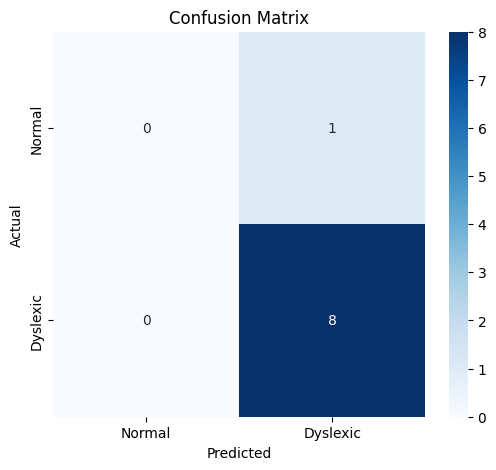

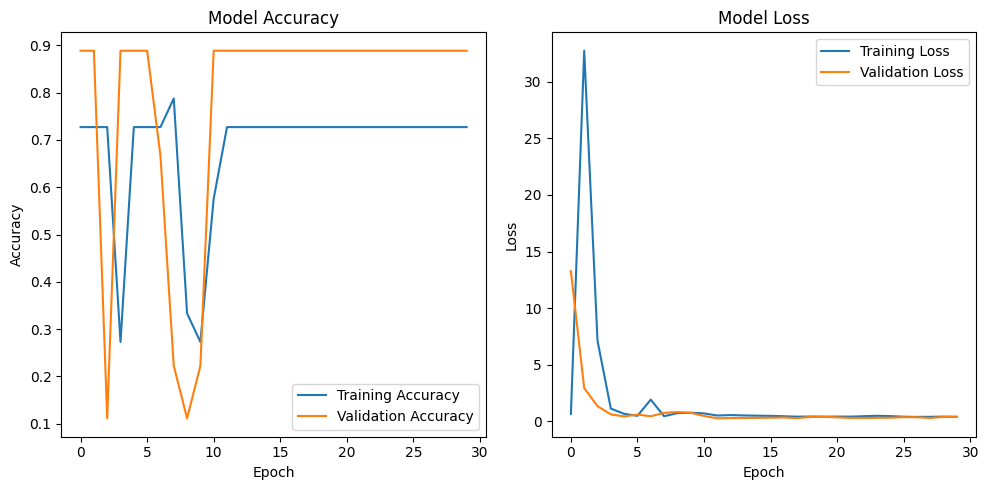

In [ ]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
import easyocr
from sklearn.model_selection import train_test_split
import re
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from spellchecker import SpellChecker

# MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

# UPDATE PATHS TO GOOGLE DRIVE
dyslexic_folder = '/content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset/dyslexic_images'
normal_folder = '/content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset/Normal'
annotation_path = '/content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset/annotations.json'

# CHECK IF FILES EXIST
if not os.path.exists(annotation_path):
    raise FileNotFoundError(f"Annotation file not found: {annotation_path}")
if not os.path.exists(dyslexic_folder):
    raise FileNotFoundError(f"Dyslexic images folder not found: {dyslexic_folder}")
if not os.path.exists(normal_folder):
    raise FileNotFoundError(f"Normal images folder not found: {normal_folder}")

class DyslexiaHandwritingAnalyzer:
    def __init__(self, dyslexic_folder, normal_folder, annotation_path):
        self.dyslexic_folder = dyslexic_folder
        self.normal_folder = normal_folder
        self.annotation_path = annotation_path
        self.reader = easyocr.Reader(['en'])
        self.model = None
        self.annotations = self._load_annotations()

    def _load_annotations(self):
        with open(self.annotation_path, 'r') as f:
            return json.load(f)

    def extract_annotation_features(self, image_name):
        default_features = [0, 0, 0, 0, 0]
        annotation = self.annotations.get(image_name, {})
        if not annotation:
            return default_features
        letter_confusions = annotation.get('letter_confusions', [])
        spelling_mistakes = annotation.get('spelling_mistakes', [])
        features = [
            len(letter_confusions),
            len(spelling_mistakes),
            sum(len(mistake) for mistake in spelling_mistakes),
            len(set(confusion['original'] for confusion in letter_confusions)) if letter_confusions else 0,
            len(set(confusion['replacement'] for confusion in letter_confusions)) if letter_confusions else 0
        ]
        return features

    def load_and_preprocess_images(self):
        images = []
        labels = []
        annotation_features = []

        def preprocess_image(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            if img is None:
                print(f"Warning: Could not read {img_path}")
                return None
            if len(img.shape) == 2:  # Grayscale image
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB
            elif img.shape[-1] == 4:  # RGBA image
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)  # Convert RGBA to BGR
            img = cv2.resize(img, (224, 224))
            img = img / 255.0
            return img

        for img_name in sorted(os.listdir(self.dyslexic_folder)):
            img_path = os.path.join(self.dyslexic_folder, img_name)
            img = preprocess_image(img_path)
            if img is not None:
                images.append(img)
                labels.append(1)
                annotation_features.append(self.extract_annotation_features(img_name))

        for img_name in sorted(os.listdir(self.normal_folder)):
            img_path = os.path.join(self.normal_folder, img_name)
            img = preprocess_image(img_path)
            if img is not None:
                images.append(img)
                labels.append(0)
                annotation_features.append([0, 0, 0, 0, 0])

        return np.array(images, dtype=np.float32), np.array(labels, dtype=np.int32), np.array(annotation_features, dtype=np.int32)

    def create_model(self):
        image_input = layers.Input(shape=(224, 224, 3))
        x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Conv2D(64, (3, 3), activation='relu')(x)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Conv2D(64, (3, 3), activation='relu')(x)
        x = layers.Flatten()(x)
        annotation_input = layers.Input(shape=(5,))
        combined = layers.concatenate([x, annotation_input])
        combined_layer = layers.Dense(64, activation='relu')(combined)
        output = layers.Dense(1, activation='sigmoid')(combined_layer)
        model = tf.keras.Model(inputs=[image_input, annotation_input], outputs=output)
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def train_model(self, test_size=0.2, epochs=30):
        images, labels, annotation_features = self.load_and_preprocess_images()
        X_train, X_test, y_train, y_test, annotation_train, annotation_test = train_test_split(
            images, labels, annotation_features, test_size=test_size, random_state=42
        )
        self.model = self.create_model()
        history = self.model.fit(
            [X_train, annotation_train], y_train,
            epochs=epochs, validation_data=([X_test, annotation_test], y_test), verbose=1
        )
        y_pred_prob = self.model.predict([X_test, annotation_test])
        y_pred = (y_pred_prob > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Dyslexic"], yticklabels=["Normal", "Dyslexic"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        return history

# Initialize and train the model
analyzer = DyslexiaHandwritingAnalyzer(dyslexic_folder, normal_folder, annotation_path)
history = analyzer.train_model(epochs=30)


# Visualize training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model to Google Drive
# Save the model in HDF5 format
analyzer.model.save('/content/drive/MyDrive/dyslexia_model.h5')



In [ ]:
!tensorflowjs_converter --input_format keras \
    /content/drive/MyDrive/dyslexia_model.h5 \
    /content/drive/MyDrive/dyslexia_model_tfjs/


/bin/bash: line 1: tensorflowjs_converter: command not found


In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs

# Load Keras model
keras_model_path = "/content/drive/MyDrive/dyslexia_handwriting_model.keras"
model = tf.keras.models.load_model(keras_model_path)

# Define input shapes explicitly
image_input_shape = (224, 224, 3)
annotation_input_shape = (5,)

# Create new input layers with the correct shapes
image_input = tf.keras.layers.Input(shape=image_input_shape, name='image_input')
annotation_input = tf.keras.layers.Input(shape=annotation_input_shape, name='annotation_input')

# Get the output of the original model using both inputs
output = model([image_input, annotation_input])

# Create a new model with the defined inputs and output
new_model = tf.keras.models.Model(inputs=[image_input, annotation_input], outputs=output)
print(new_model.input_shape)

# Save as TF.js model
tfjs_output_path = "/content/drive/MyDrive/dyslexia_model_tfjs"
tfjs.converters.save_keras_model(new_model, tfjs_output_path)

print("Model reconverted successfully!")

[(None, 224, 224, 3), (None, 5)]
failed to lookup keras version from the file,
    this is likely a weight only file
Model reconverted successfully!


In [ ]:
import shutil
from google.colab import files

# Zip the converted model folder
zip_path = "/content/dyslexia_model_tfjs.zip"
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', "/content/drive/MyDrive/dyslexia_model_tfjs")

# Download the zip file
files.download(zip_path)

RuntimeError: File size too large, try using force_zip64

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step



--- Detailed Handwriting Analysis ---
Extracted Text: Radl Aalccph GQ VZSV VOICcno S LQtcea fksn Yuces

Spelling Errors:
- 'Radl' (Suggested corrections: rail, raul, rads)
- 'Aalccph' (Suggested corrections: )
- 'GQ' (Suggested corrections: qq, gk, gd, ge, gr, ga, sq, gs, gi, q, go, g)
- 'VZSV' (Suggested corrections: vest, vasa, vav, vase, zs, vas, visa, vs, v's, vise, azov, vast)
- 'VOICcno' (Suggested corrections: volcano, voicing)
- 'LQtcea' (Suggested corrections: )
- 'fksn' (Suggested corrections: fawn, fins, akan, finn, fran, fyn, firn, ks, foin, fans, akin, fin, kun, fain, fuse, fens, fan, oks, sn, fisc, faun, föhn, mks, fisk, fen, faso, ikon, fun, skin, fess, kan, fern, fuss, fast, frs, fash, fist, fish, ken, f's, kin, flan, fest)
- 'Yuces' (Suggested corrections: yucks, yules)

Dyslexic Writing Mistakes:
- Radl: Potential Backwards Spelling
- Aalccph: Potential Backwards Spelling
- GQ: Potential Backwards Spelling
- VZSV: Potential Backwards Spelling
- VOICcno: Potential Bac

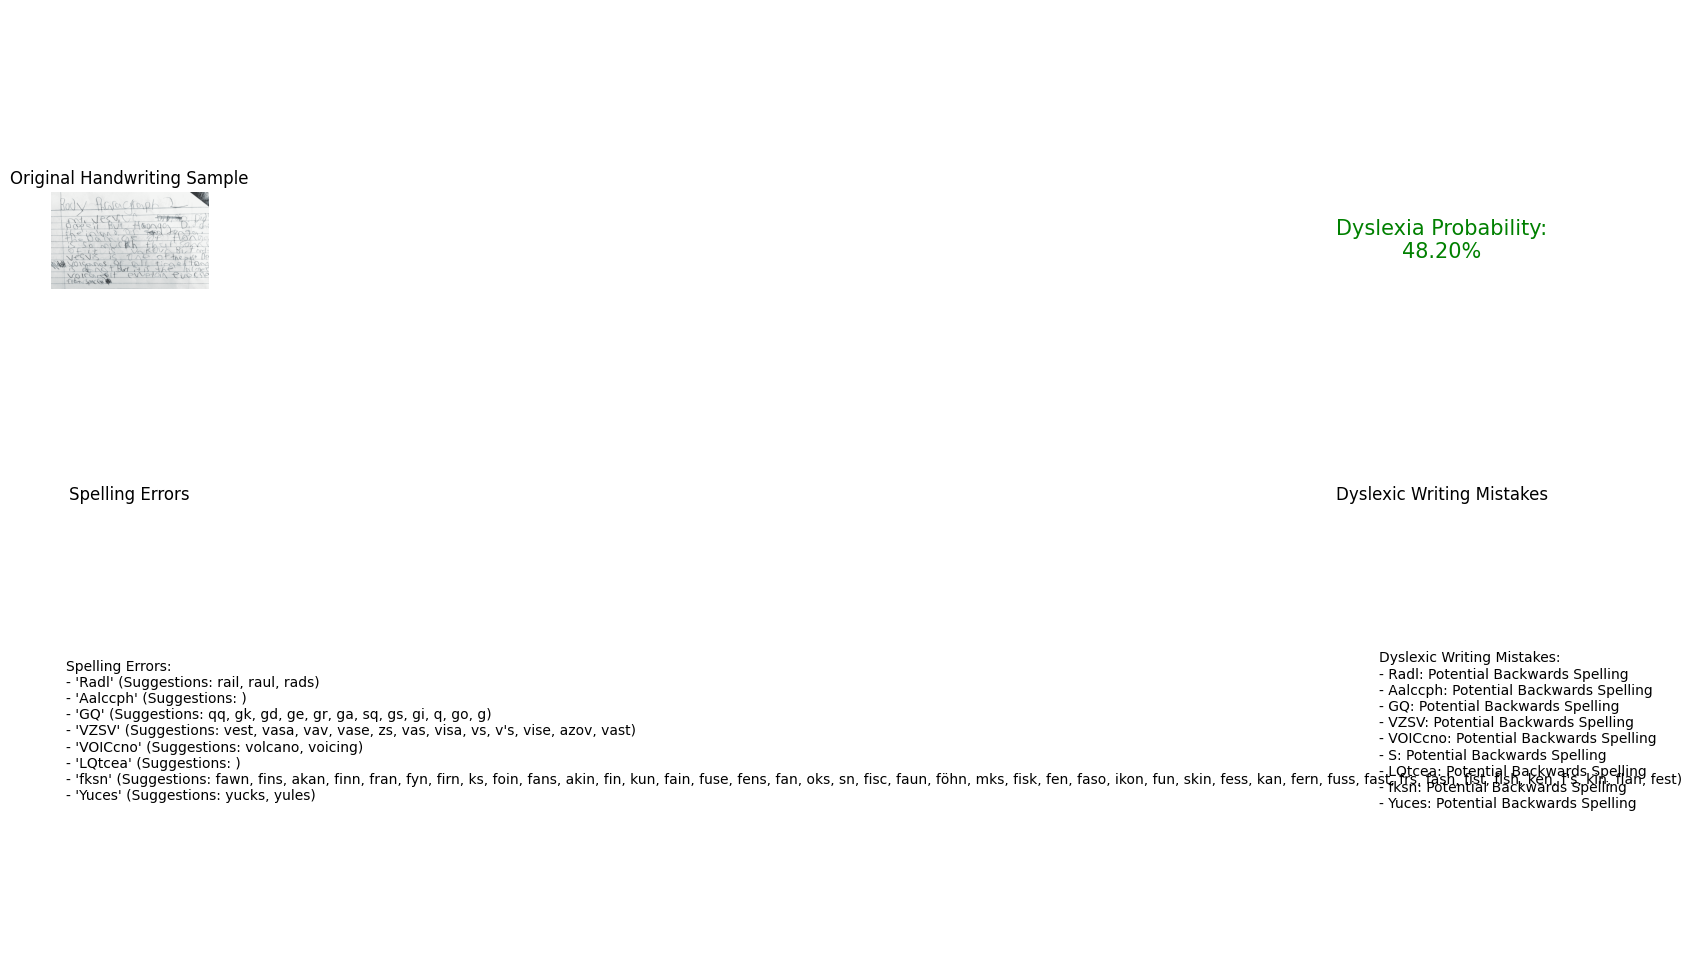

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import easyocr
from tensorflow.keras.models import load_model

class DyslexiaHandwritingAnalyzer:
    def __init__(self, dyslexic_folder, normal_folder, annotation_path):
        """
        Initialize the handwriting analysis model with annotations

        Args:
            dyslexic_folder (str): Path to folder with dyslexic handwriting images
            normal_folder (str): Path to folder with normal handwriting images
            annotation_path (str): Path to annotation JSON file
        """
        self.dyslexic_folder = dyslexic_folder
        self.normal_folder = normal_folder
        self.annotation_path = annotation_path
        self.reader = easyocr.Reader(['en'])
        self.model = None
        self.annotations = self._load_annotations()

    def _load_annotations(self):
        """
        Load annotations from JSON file

        Returns:
            dict: Parsed annotations
        """
        try:
            with open(self.annotation_path, 'r') as f:
                return json.load(f)
        except FileNotFoundError:
            print(f"Warning: Annotation file {self.annotation_path} not found. Using empty annotations.")
            return {}

    def predict_handwriting(self, image, model):
        """
        Predict handwriting characteristics using a pre-trained model

        Args:
            image (numpy.ndarray): Input image
            model (tf.keras.Model): Pre-trained model

        Returns:
            dict: Analysis results
        """
        # Preprocess image
        img = cv2.resize(image, (224, 224))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Default annotation features
        annotation_features = np.array([[0, 0, 0, 0, 0]])

        # Predict dyslexia probability
        dyslexia_probability = model.predict([img, annotation_features])[0][0]

        # Use EasyOCR to extract text
        reader = easyocr.Reader(['en'])
        ocr_results = reader.readtext(image)

        # Extract text from OCR results
        extracted_text = ' '.join([result[1] for result in ocr_results])

        # Spelling error detection
        spelling_errors = self.detect_spelling_errors(extracted_text)

        # Letter reversal detection
        letter_reversal_errors = self.detect_letter_reversals(extracted_text)

        return {
            'dyslexia_probability': float(dyslexia_probability),
            'extracted_text': extracted_text,
            'spelling_errors': spelling_errors,
            'dyslexic_mistakes': letter_reversal_errors
        }

    def detect_spelling_errors(self, text):
        """
        Detect spelling errors in the text

        Args:
            text (str): Input text to analyze

        Returns:
            list: Detected spelling errors
        """
        from spellchecker import SpellChecker

        spell = SpellChecker()
        words = text.split()

        spelling_errors = []
        for word in words:
            if word.lower() not in spell:
                suggestions = spell.candidates(word)
                spelling_errors.append({
                    'original': word,
                    'suggestions': list(suggestions) if suggestions else []
                })

        return spelling_errors

    def detect_letter_reversals(self, text):
        """
        Detect letter and word reversals

        Args:
            text (str): Input text to analyze

        Returns:
            list: Detected letter and word reversals
        """
        import re

        reversal_patterns = [
            {'pattern': r'\b[bd]\b', 'type': 'Letter Reversal (b/d)'},
            {'pattern': r'\b[pq]\b', 'type': 'Letter Reversal (p/q)'},
            {'pattern': r'\b(\w+)\s+\1\b', 'type': 'Word Repetition'},
            {'pattern': r'\b(\w+)(?=\s|$)', 'type': 'Potential Backwards Spelling'}
        ]

        dyslexic_mistakes = []
        for pattern_info in reversal_patterns:
            matches = re.findall(pattern_info['pattern'], text, re.IGNORECASE)

            for match in matches:
                dyslexic_mistakes.append({
                    'word': match,
                    'type': pattern_info['type']
                })

        return dyslexic_mistakes

def visualize_analysis_results(image_path, analysis_results):
    """
    Visualize the analysis results

    Args:
        image_path (str): Path to the original image
        analysis_results (dict): Analysis results from the model
    """
    # Load the image
    image = cv2.imread(image_path)

    # Create a results display
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Handwriting Sample')
    plt.axis('off')

    # Dyslexia Probability
    plt.subplot(2, 2, 2)
    plt.text(0.5, 0.5,
             f"Dyslexia Probability:\n{analysis_results['dyslexia_probability']*100:.2f}%",
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=15,
             color='red' if analysis_results['dyslexia_probability'] > 0.5 else 'green')
    plt.axis('off')

    # Spelling Errors
    plt.subplot(2, 2, 3)
    plt.title('Spelling Errors')
    spelling_text = "Spelling Errors:\n"
    if analysis_results['spelling_errors']:
        for error in analysis_results['spelling_errors']:
            spelling_text += f"- '{error['original']}' (Suggestions: {', '.join(error['suggestions'])})\n"
    else:
        spelling_text += "No spelling errors detected"
    plt.text(0.1, 0.5, spelling_text, fontsize=10, verticalalignment='center')
    plt.axis('off')

    # Dyslexic Mistakes
    plt.subplot(2, 2, 4)
    plt.title('Dyslexic Writing Mistakes')
    mistakes_text = "Dyslexic Writing Mistakes:\n"
    if analysis_results['dyslexic_mistakes']:
        for mistake in analysis_results['dyslexic_mistakes']:
            mistakes_text += f"- {mistake['word']}: {mistake['type']}\n"
    else:
        mistakes_text += "No dyslexic writing mistakes detected"
    plt.text(0.1, 0.5, mistakes_text, fontsize=10, verticalalignment='center')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    # Paths configuration
    model_path = '/content/drive/MyDrive/dyslexia_handwriting_model.keras'
    annotation_path = '/content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset/annotation.json'
    image_path = '/content/drive/MyDrive/Dyslexia_Dataset-20250331T114652Z-001/Dyslexia_Dataset/dyslexic_images/image1.png'

    try:
        # Load the pre-trained model
        model = load_model(model_path)

        # Initialize analyzer
        analyzer = DyslexiaHandwritingAnalyzer(
            dyslexic_folder='/content/dataset/dyslexic_images',
            normal_folder='/content/dataset/Normal',
            annotation_path=annotation_path
        )

        # Load and preprocess the image
        image = cv2.imread(image_path)

        # Analyze the handwriting sample
        analysis_results = analyzer.predict_handwriting(image, model)

        # Print detailed text analysis
        print("\n--- Detailed Handwriting Analysis ---")
        print(f"Extracted Text: {analysis_results.get('extracted_text', 'No text extracted')}")

        print("\nSpelling Errors:")
        if analysis_results['spelling_errors']:
            for error in analysis_results['spelling_errors']:
                print(f"- '{error['original']}' (Suggested corrections: {', '.join(error['suggestions'])})")
        else:
            print("No spelling errors detected.")

        print("\nDyslexic Writing Mistakes:")
        if analysis_results['dyslexic_mistakes']:
            for mistake in analysis_results['dyslexic_mistakes']:
                print(f"- {mistake['word']}: {mistake['type']}")
        else:
            print("No dyslexic writing mistakes detected.")

        # Visualize results
        visualize_analysis_results(image_path, analysis_results)

    except Exception as e:
        print(f"An error occurred during analysis: {e}")
        import traceback
        traceback.print_exc()

# Run the analysis
if __name__ == '__main__':
    main()